In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from matplotlib.ticker import MaxNLocator
import sys,os
sys.path.append('/Users/brandonmanley/Desktop/PhD/dijet_dsa/bmanley')
import dsa_mc.dijet_utils as dutils

In [3]:
dj = dutils.DijetXsec()

In [4]:
ndipole, pdipoles = dj.get_dipoles()
int_ndipole, int_pdipoles = dj.get_int_dipoles()


In [17]:
Npoints = np.array([ndipole['y'].to_numpy(), ndipole['ln(r)'].to_numpy()]).T
int_dfN = pd.DataFrame(np.array([ndipole['y'].to_numpy(), ndipole['ln(r)'].to_numpy(), int_ndipole(Npoints)]).T, columns=['y', 'ln(r)', 'N[ln(r)]'])


Ppoints = np.array([pdipoles['s10'].to_numpy(), pdipoles['eta'].to_numpy()]).T
int_dfQu = pd.DataFrame(np.array([pdipoles['s10'].to_numpy(), pdipoles['eta'].to_numpy(), int_pdipoles['Qu'](Ppoints)]).T, columns=['s10', 'eta', 'Qu'])



In [27]:
max(int_dfN['N[ln(r)]'] - ndipole['N[ln(r)]'])
min(int_dfQu['Qu'] - pdipoles['Qu'])

-18003439925.25

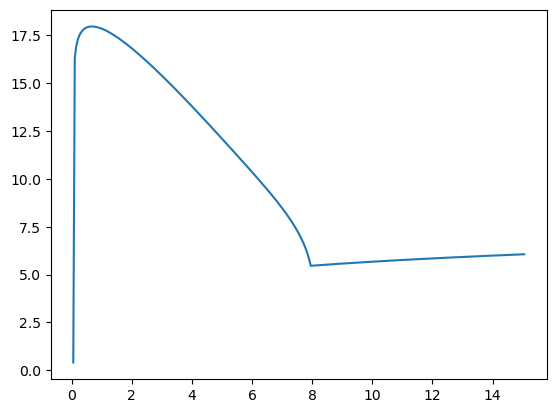

In [83]:
# plot dipole at \eta = test value
bas = np.sqrt(3/(2*np.pi))
test_s = 100**2
test_y = 0.9
target_eta = round((bas/0.05)*np.log((test_s*test_y)/(0.3**2)))*0.05
f_pdipoles = pdipoles[np.isclose(pdipoles['eta'], target_eta, atol=0.05*0.5)]


s10 = f_pdipoles['s10'].to_numpy()
amp_values = f_pdipoles['G2'].to_numpy()

eta_values = np.full_like(s10, target_eta)
int_amp_values = int_pdipoles['Qu'](np.array([s10, eta_values]).T)

# plt.plot(s10, amp_values- int_amp_values)
plt.plot(s10, np.log(np.abs(amp_values)))



In [65]:
f_pdipoles

,s10,eta,Qu,Qd,Qs,G2,I3u,I3d,I3s,I4,I5
158,0.05,7.95,-3.484297e+08,-3.484412e+08,-3.484236e+08,-1.502932e+00,3.768292e+02,3.769182e+02,3.768441e+02,-8.684245,-2.951175
459,0.10,7.95,-3.246313e+08,-3.246428e+08,-3.246252e+08,-1.221073e+07,1.602679e+07,1.602679e+07,1.602679e+07,6.260007,-305271.116369
760,0.15,7.95,-3.024992e+08,-3.025107e+08,-3.024932e+08,-2.272029e+07,2.997408e+07,2.997408e+07,2.997408e+07,-3480.728351,-433733.397410
1061,0.20,7.95,-2.818807e+08,-2.818921e+08,-2.818746e+08,-3.167576e+07,4.197611e+07,4.197611e+07,4.197611e+07,-7415.227482,-499596.781738
1362,0.25,7.95,-2.626470e+08,-2.626584e+08,-2.626409e+08,-3.921815e+07,5.217991e+07,5.217991e+07,5.217991e+07,-11125.777593,-533286.178345
...,...,...,...,...,...,...,...,...,...,...,...
89254,14.85,7.95,1.472277e+03,-1.579804e+03,1.651192e+03,-4.232535e+02,-1.209340e+03,-1.225962e+03,-2.697648e+03,3547.726054,1083.736137
89555,14.90,7.95,1.477384e+03,-1.589024e+03,1.653464e+03,-4.246179e+02,-1.215514e+03,-1.230238e+03,-2.704250e+03,3555.930271,1089.917813
89856,14.95,7.95,1.482491e+03,-1.598245e+03,1.655737e+03,-4.259823e+02,-1.221688e+03,-1.234515e+03,-2.710852e+03,3564.134488,1096.099488
90157,15.00,7.95,1.487597e+03,-1.607465e+03,1.658009e+03,-4.273467e+02,-1.227862e+03,-1.238791e+03,-2.717455e+03,3572.338705,1102.281164


In [9]:
import numpy as np
np.linspace(0, 2*np.pi, 10)
np.linspace(0, 2*np.pi, 10)

array([0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
       3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531])

In [13]:
data = np.load('../dsa_mc/test_fit.npy')
np.savetxt('test_fit.dat', data)